In [23]:
TRAIN_PATH = 'dataset/Train'
TEST_PATH = 'dataset/Test'
SIZE = (240, 240)

In [24]:
import os
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['freshapples', 'freshcucumber', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottencucumber', 'rottenoranges', 'rottenpotato', 'rottentomato']


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = datagen.flow_from_directory(
    batch_size=32,
    directory=TRAIN_PATH,
    shuffle=True,
    classes=labels,  # Assuming 'labels' is a list of class names
    target_size=SIZE,  # Assuming 'SIZE' is a tuple like (240, 240)
    subset="training",
    class_mode='categorical'  # Important: Set to 'categorical' for one-hot encoding
)

val_dataset = datagen.flow_from_directory(
    batch_size=32,
    directory=TRAIN_PATH,  # Use the same directory for validation
    shuffle=False,  # Generally not shuffled for validation
    classes=labels,
    target_size=SIZE,
    subset="validation",
    class_mode='categorical'
)

Found 13209 images belonging to 10 classes.
Found 1462 images belonging to 10 classes.


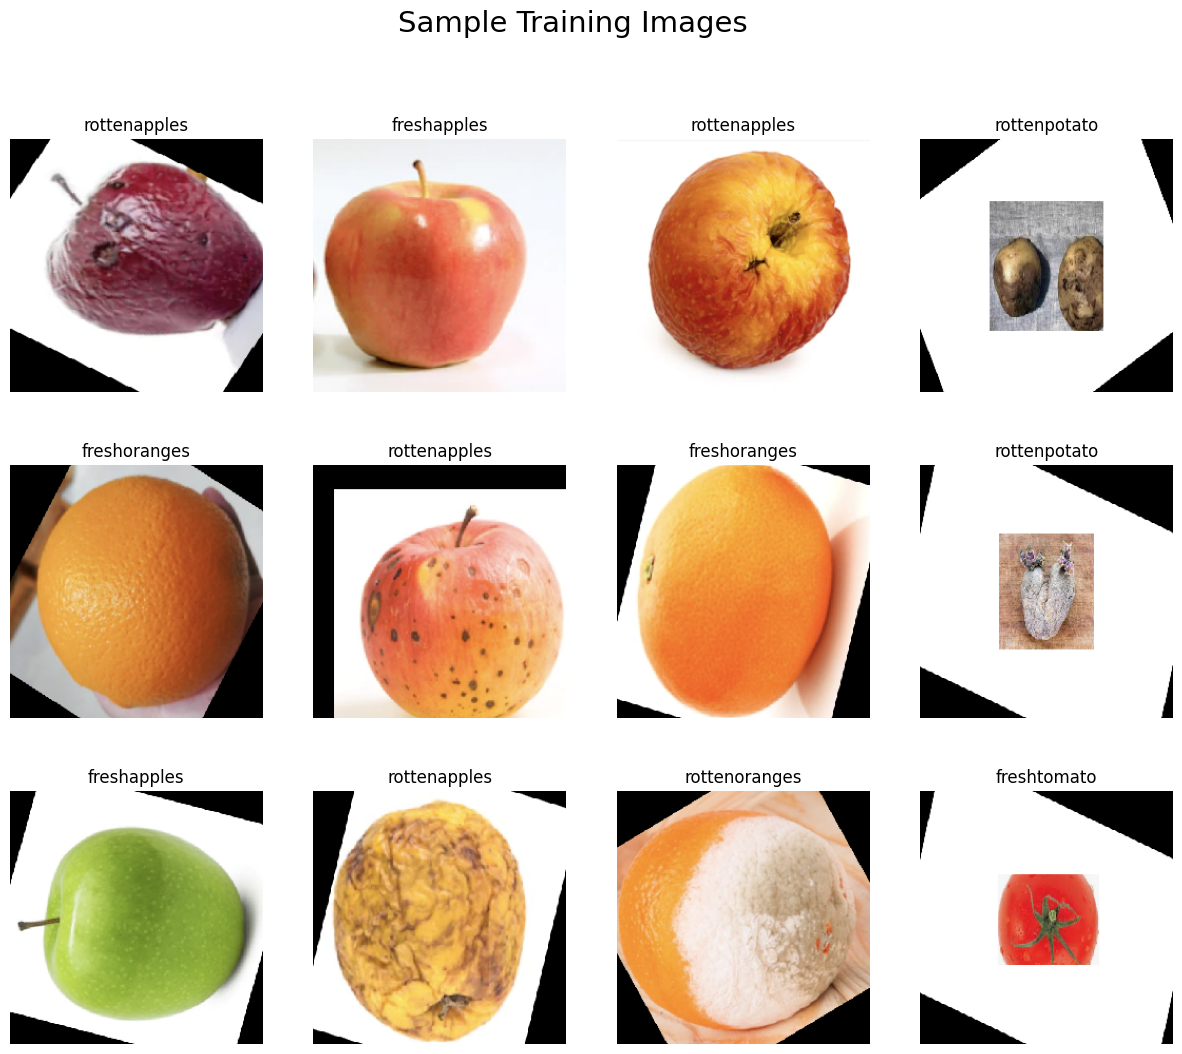

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [27]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    print("the size of a image",image.shape)
    plt.imshow(image)

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


tf.config.threading.set_intra_op_parallelism_threads(8)
tf.config.threading.set_inter_op_parallelism_threads(8)

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,947,338 (49.39 MB)

 Trainable params: 12,947,338 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    callbacks=[early_stopping] # corrected spelling here
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 272s 656ms/step - accuracy: 0.5290 - loss: 1.3468 - val_accuracy: 0.6471 - val_loss: 0.7583
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 272s 659ms/step - accuracy: 0.8358 - loss: 0.4261 - val_accuracy: 0.8393 - val_loss: 0.4317
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 270s 654ms/step - accuracy: 0.8971 - loss: 0.2623 - val_accuracy: 0.8707 - val_loss: 0.3582
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 286s 692ms/step - accuracy: 0.9183 - loss: 0.2079 - val_accuracy: 0.8899 - val_loss: 0.3023
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 279s 676ms/step - accuracy: 0.9404 - loss: 0.1587 - val_accuracy: 0.8714 - val_loss: 0.3323
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 276s 668ms/step - accuracy: 0.9534 - loss: 0.1231 - val_accuracy: 0.9234 - val_loss: 0.2861
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 272s 658ms/step - accuracy: 0.9602 - loss: 0.1094 - val_accuracy: 0.8358 - val_loss: 0.3929
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 287s 694ms/step - accuracy: 0.9578 -

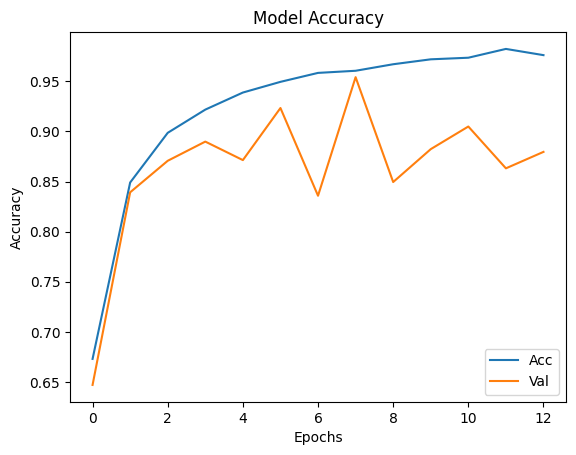

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

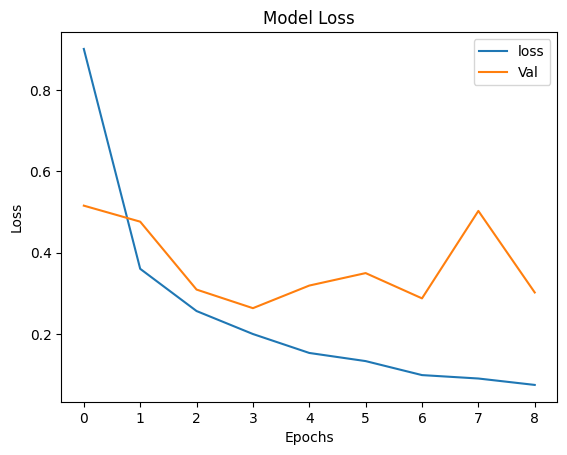

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 3104 images belonging to 10 classes.
3104/3104 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9792 - loss: 0.1138
accuracy test:  0.9449098110198975
loss test:  0.2038290649652481


In [35]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]


3104/3104 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step


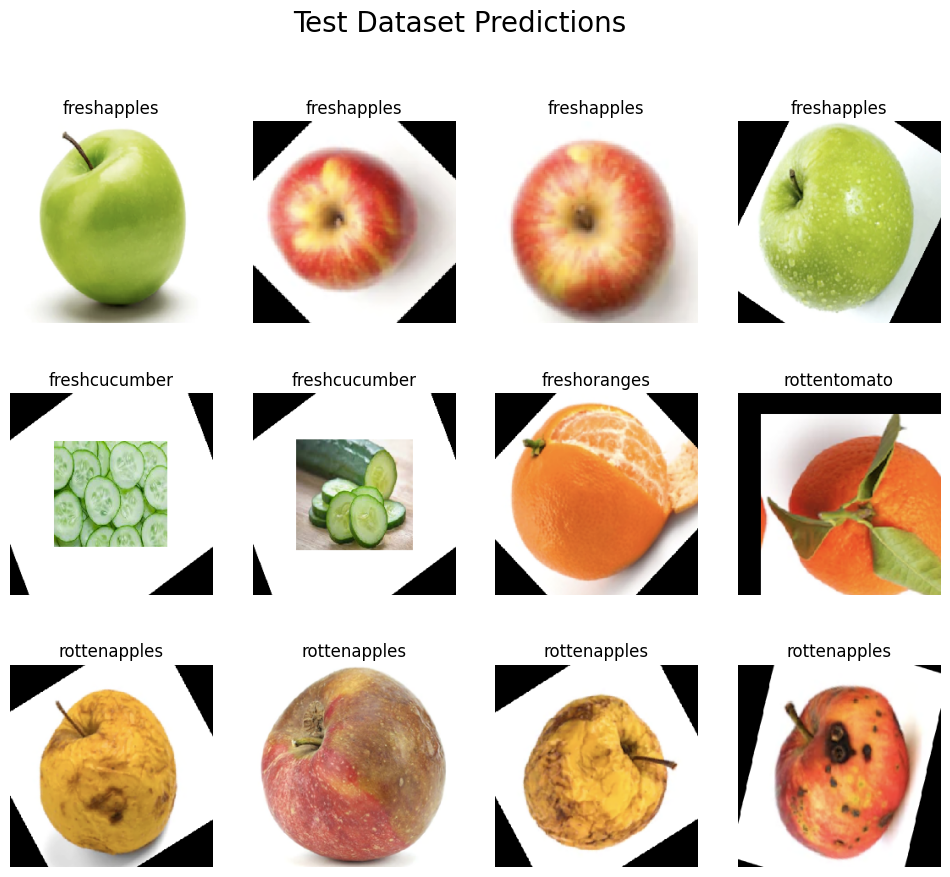

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [37]:
# Assuming `Model` is a valid Keras model instmodel.save('gfgModel.h5')
model.save('frcdv1.h5')